In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/lung_cancer_dataset.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10-09-2017,0
1,2,50,Female,Netherlands,20-04-2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17-06-2024,1
2,3,65,Female,Hungary,05-04-2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09-04-2024,0
3,4,51,Female,Belgium,05-02-2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23-04-2017,0
4,5,37,Male,Luxembourg,29-11-2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08-01-2025,0


In [ ]:
df.shape

(890000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.nunique()

,0
id,890000
age,95
gender,2
country,27
diagnosis_date,3651
cancer_stage,4
family_history,2
smoking_status,4
bmi,291
cholesterol_level,151


In [ ]:
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], format='%d-%m-%Y', errors='coerce')
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], format='%d-%m-%Y', errors='coerce')
df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

In [ ]:
df.drop('id', axis=1, inplace=True)
df.drop('diagnosis_date', axis=1, inplace=True)
df.drop('end_treatment_date', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      890000 non-null  int64  
 1   gender                   890000 non-null  object 
 2   country                  890000 non-null  object 
 3   cancer_stage             890000 non-null  object 
 4   family_history           890000 non-null  object 
 5   smoking_status           890000 non-null  object 
 6   bmi                      890000 non-null  float64
 7   cholesterol_level        890000 non-null  int64  
 8   hypertension             890000 non-null  int64  
 9   asthma                   890000 non-null  int64  
 10  cirrhosis                890000 non-null  int64  
 11  other_cancer             890000 non-null  int64  
 12  treatment_type           890000 non-null  object 
 13  survived                 890000 non-null  int64  
 14  trea

In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical_features,non_categorical_features,discrete_features,continuous_features =  classify_features(df)

In [ ]:
print('Categorical_Features: ',categorical_features)
print('\nNon_Categorical_Features: ',non_categorical_features)
print('\nDiscrete_Features: ',discrete_features)
print('\nContinuous_Features: ',continuous_features)

Categorical_Features:  ['gender', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']

Non_Categorical_Features:  ['country']

Discrete_Features:  ['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

Continuous_Features:  ['age', 'bmi', 'cholesterol_level', 'treatment_duration_days']


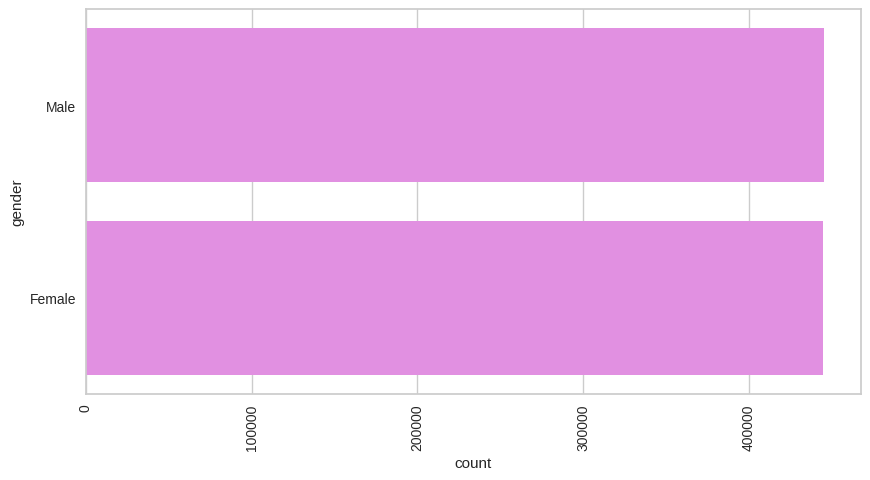

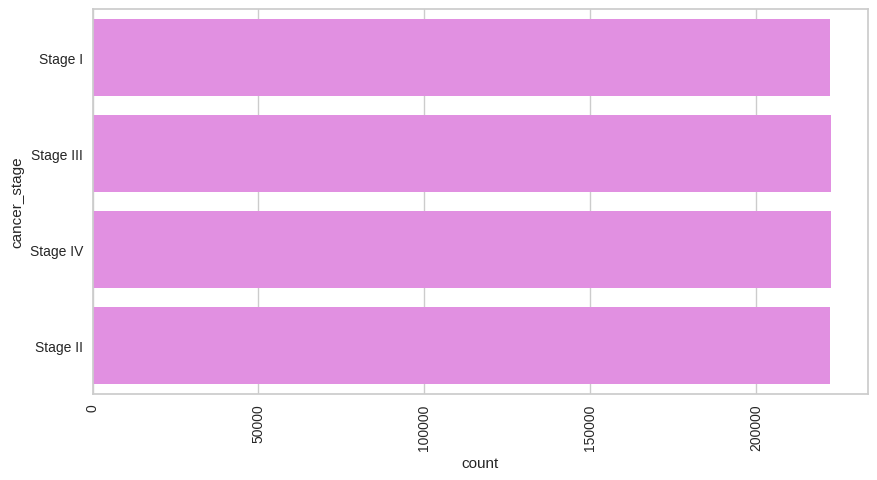

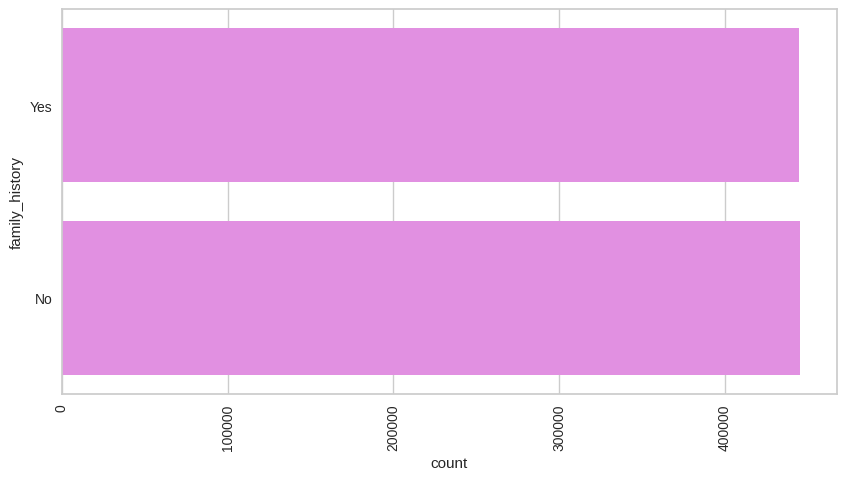

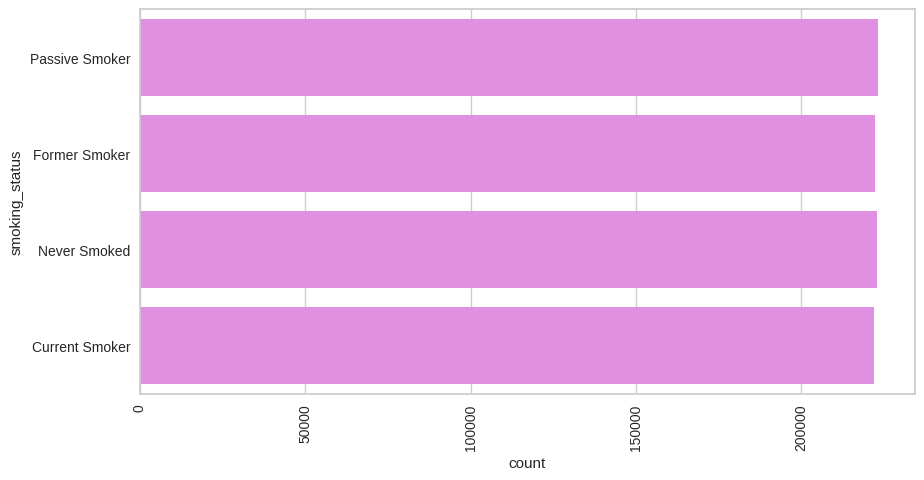

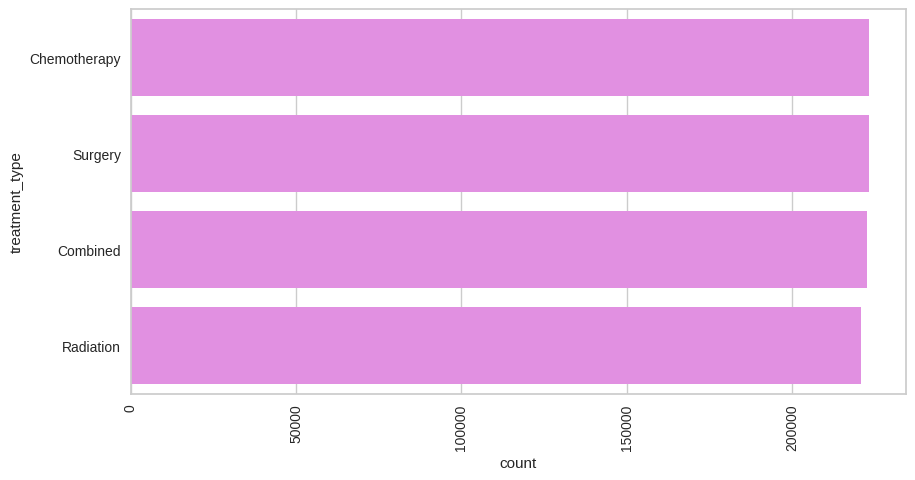

In [ ]:
for i in categorical_features:
  plt.figure(figsize=(10,5))
  sns.countplot(df[i],color='violet')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
import plotly.express as px

for i in categorical_features:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f"Distribution of {i}",
                 color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#48BF91', '#F7B731', '#8A6FDF', '#1A759F', '#FFD166', '#C70039'])
    fig.show()

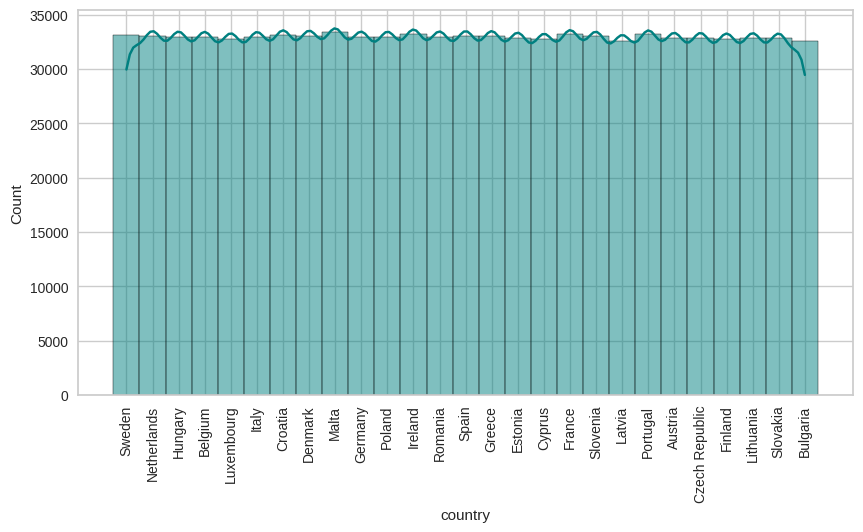

In [ ]:
for i in non_categorical_features:
  plt.figure(figsize=(10,5))
  sns.histplot(df[i],color='teal',kde=True)
  plt.xticks(rotation=90)
  plt.show()

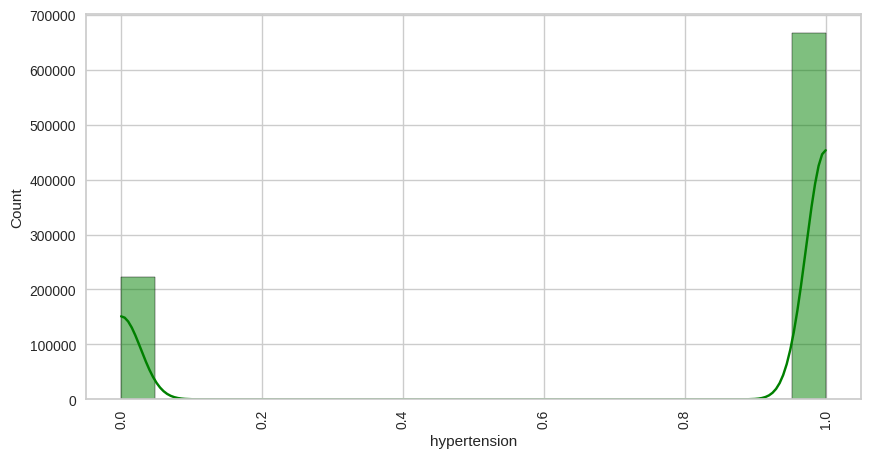

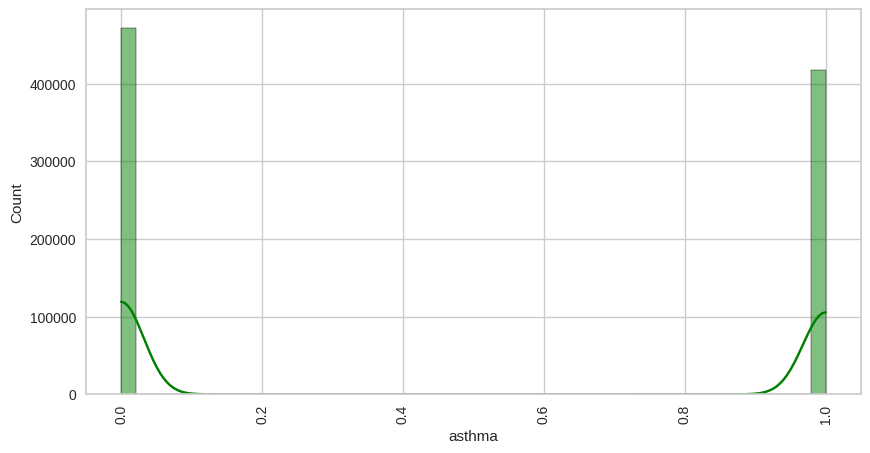

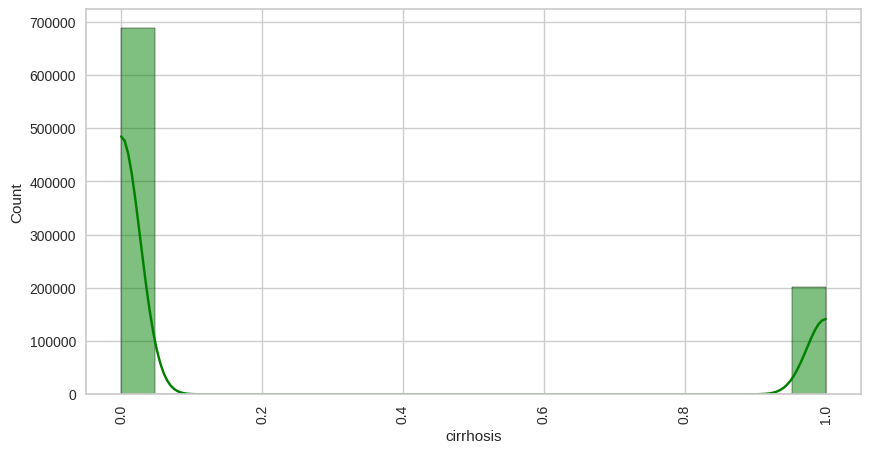

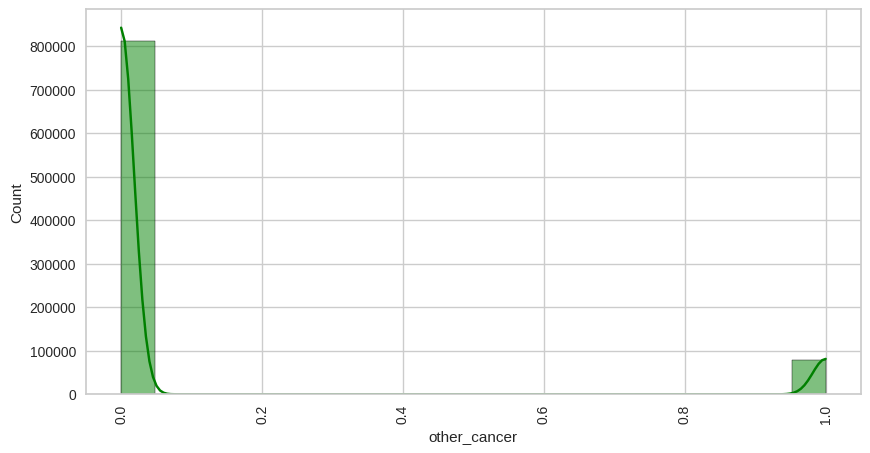

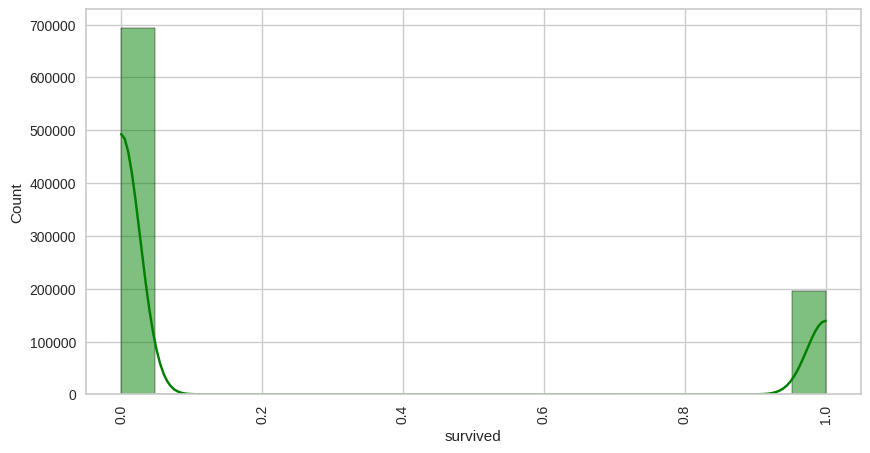

In [ ]:
for i in discrete_features:
  plt.figure(figsize=(10,5))
  sns.histplot(df[i],color='green',kde='True')
  plt.xticks(rotation=90)
  plt.show()

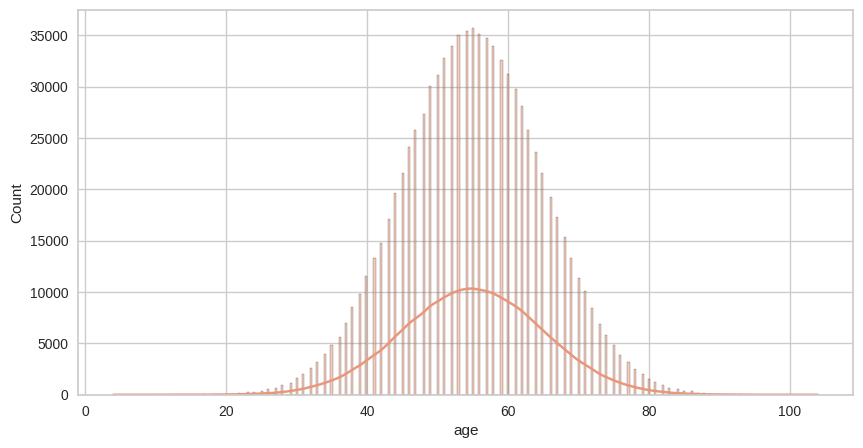

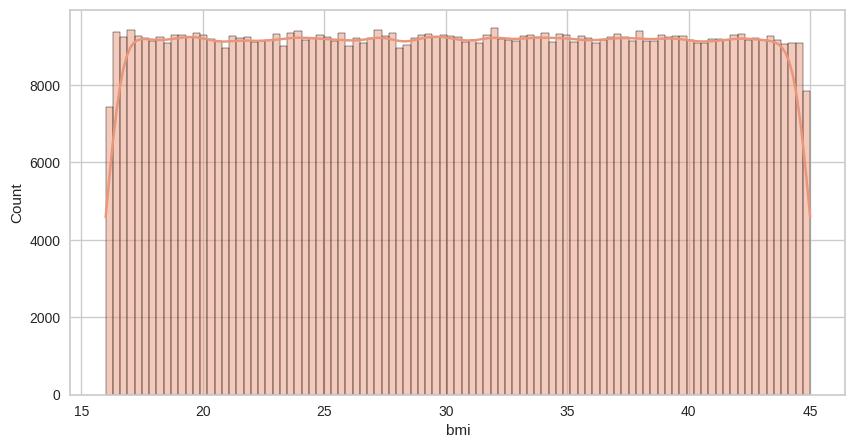

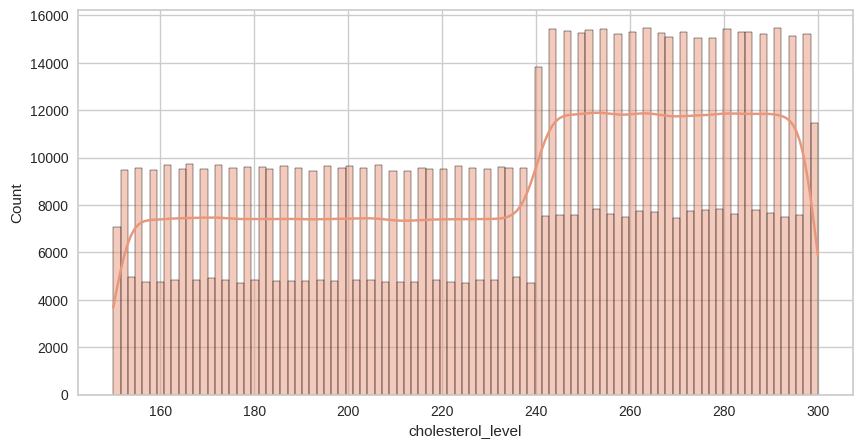

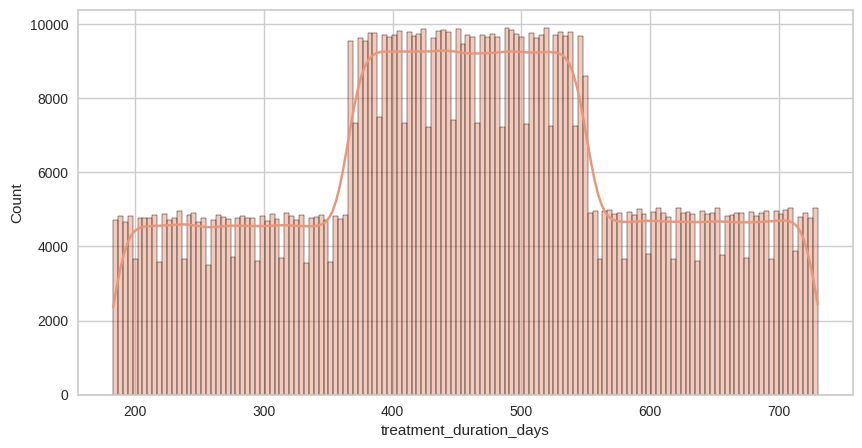

In [ ]:
for i in continuous_features:
  plt.figure(figsize=(10,5))
  sns.histplot(df[i],color='#E9967A',kde=True)
  plt.xticks(rotation=360)
  plt.show()

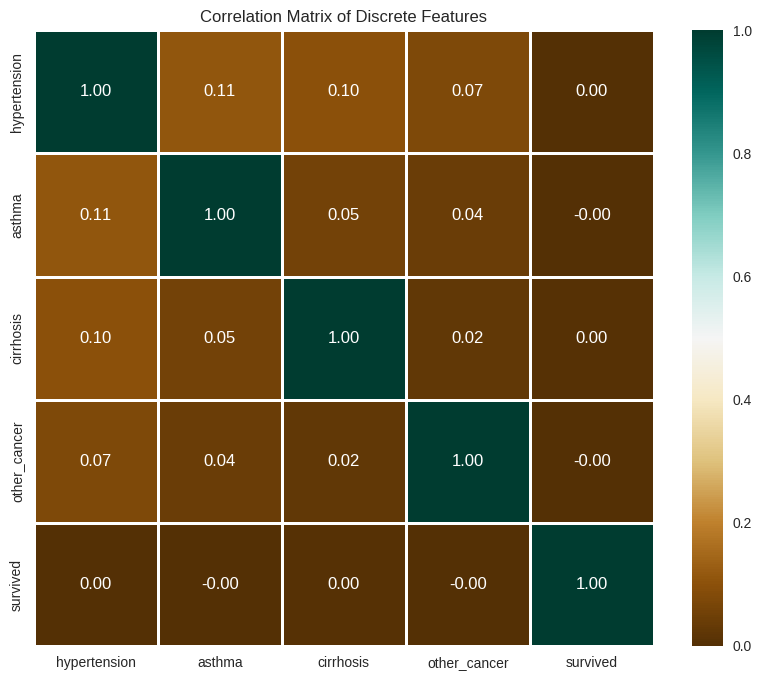

In [ ]:
corr_matrix =df[discrete_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='BrBG',fmt='.2f',linewidths=2)
plt.title('Correlation Matrix of Discrete Features')
plt.xticks(rotation=360)
plt.show()

In [ ]:
corr_matrix

,hypertension,asthma,cirrhosis,other_cancer,survived
hypertension,1.000000,0.108201,0.097139,0.073651,0.000059
asthma,0.108201,1.000000,0.053147,0.039283,-0.001809
cirrhosis,0.097139,0.053147,1.000000,0.022671,0.001956
other_cancer,0.073651,0.039283,0.022671,1.000000,-0.001972
survived,0.000059,-0.001809,0.001956,-0.001972,1.000000


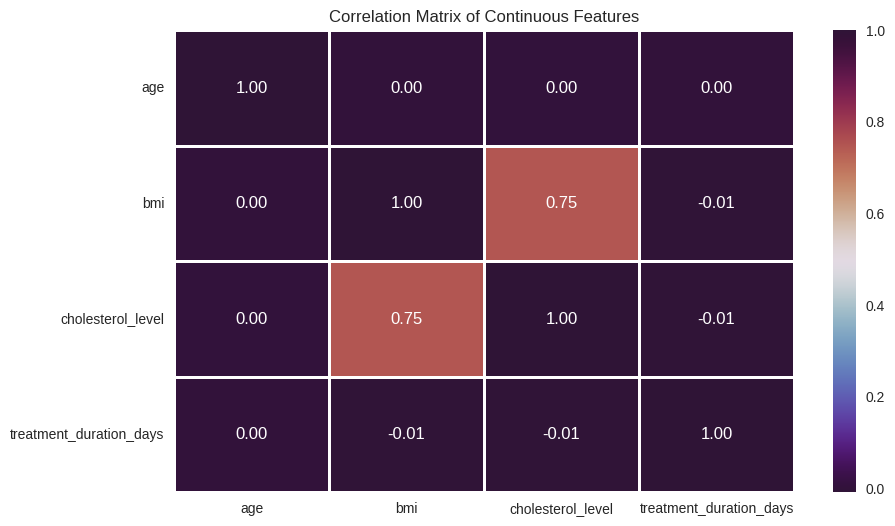

In [ ]:
corr_matrix2 =df[continuous_features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix2,annot=True,cmap='twilight_shifted',fmt='.2f',linewidths=2)
plt.title('Correlation Matrix of Continuous Features')
plt.xticks(rotation=360)
plt.show()

In [ ]:
corr_matrix2

,age,bmi,cholesterol_level,treatment_duration_days
age,1.000000,0.000915,0.001799,0.000246
bmi,0.000915,1.000000,0.746905,-0.007400
cholesterol_level,0.001799,0.746905,1.000000,-0.008703
treatment_duration_days,0.000246,-0.007400,-0.008703,1.000000


In [ ]:
df['survived'].value_counts()

,count
survived,
0,693996
1,196004


In [ ]:
data=df.sample(frac=0.80,random_state=42).reset_index(drop=True)
data_unseen=df.drop(data.index).reset_index(drop=True)

In [ ]:
print(data.shape,data_unseen.shape)

(712000, 15) (178000, 15)


In [ ]:
%pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
classification_model=(setup(data=data,target='survived',session_id=42))

,Description,Value
0,Session id,42
1,Target,survived
2,Target type,Binary
3,Original data shape,"(712000, 15)"
4,Transformed data shape,"(712000, 24)"
5,Transformed train set shape,"(498399, 24)"
6,Transformed test set shape,"(213601, 24)"
7,Numeric features,8
8,Categorical features,6
9,Preprocess,True


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:50:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Linear Kernel


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7798,0.5002,0.0000,0.0000,0.0000,0.0000,0.0000,18.8440
nb,Naive Bayes,0.7798,0.4999,0.0000,0.0000,0.0000,0.0000,0.0000,5.3460
knn,K Neighbors Classifier,0.7384,0.5031,0.0765,0.2245,0.1141,0.0024,0.0029,397.5800
dt,Decision Tree Classifier,0.6406,0.4989,0.2456,0.2187,0.2314,-0.0021,-0.0022,15.8500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]